In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

<ipython-input-5-21663837a7fb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emission_2['Cumulative CO₂ emissions'] = emission_2['Cumulative CO₂ emissions']/(3.7*10**12)


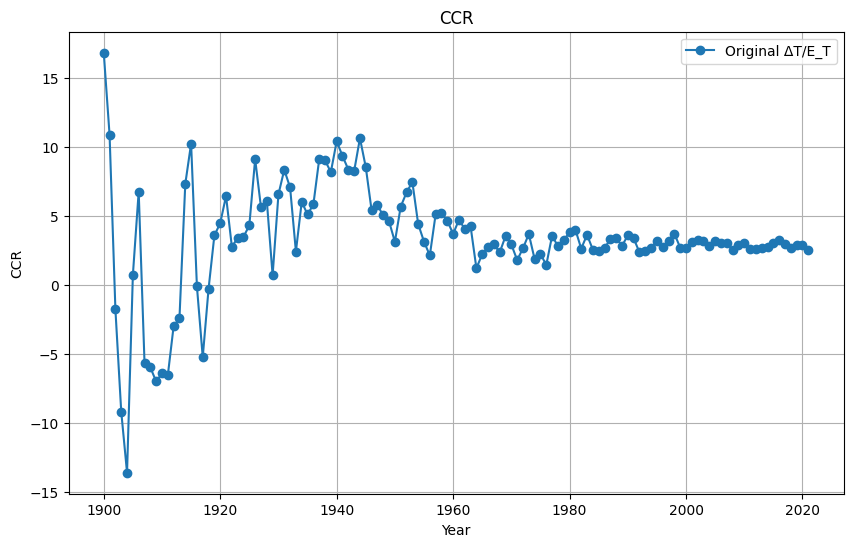

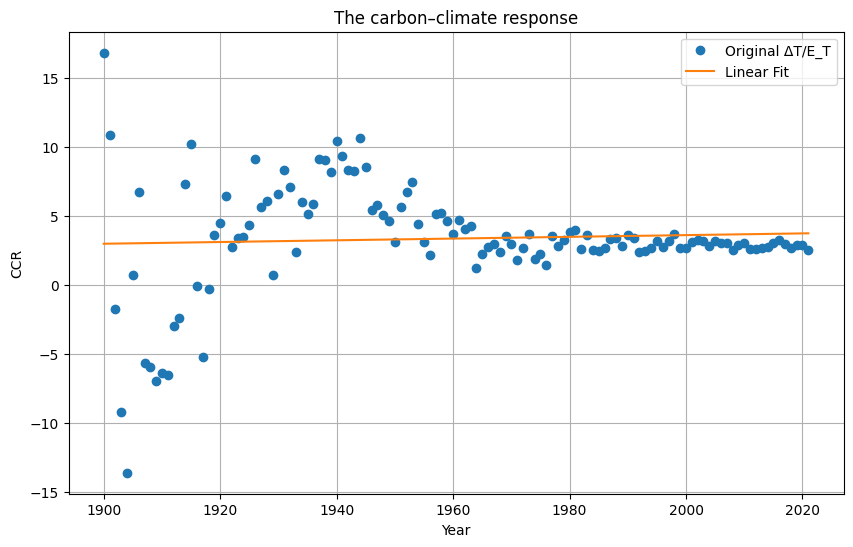

Linear Fit Function: CCR = 0.0062 * Year + -8.8830
平均值: 3.362412178249469
平均值: 2.977032595369421
3.7266813677929105


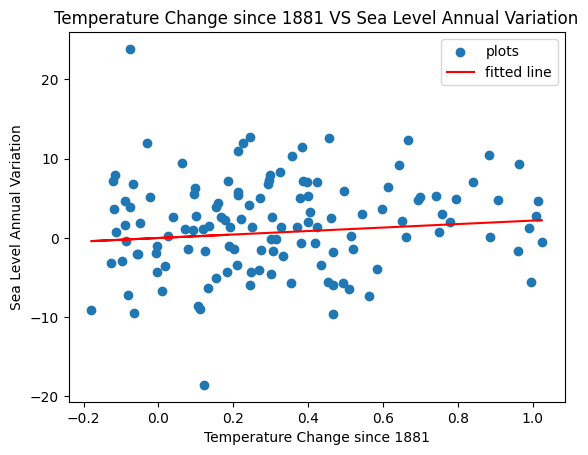

      Entity      Code  Year  Annual CO₂ emissions (zero filled)  \
72180  World  OWID_WRL  1850                        1.968960e+08   
72181  World  OWID_WRL  1851                        1.988050e+08   
72182  World  OWID_WRL  1852                        2.075509e+08   
72183  World  OWID_WRL  1853                        2.172092e+08   
72184  World  OWID_WRL  1854                        2.551390e+08   
...      ...       ...   ...                                 ...   
72347  World  OWID_WRL  2017                        3.609674e+10   
72348  World  OWID_WRL  2018                        3.682651e+10   
72349  World  OWID_WRL  2019                        3.708256e+10   
72350  World  OWID_WRL  2020                        3.526409e+10   
72351  World  OWID_WRL  2021                        3.712385e+10   

       Cumulative CO₂ emissions  
72180              1.968960e+08  
72181              3.957010e+08  
72182              6.032520e+08  
72183              8.204612e+08  
72184        

<ipython-input-5-21663837a7fb>:142: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(logistic, x, y, p0, maxfev=10000)


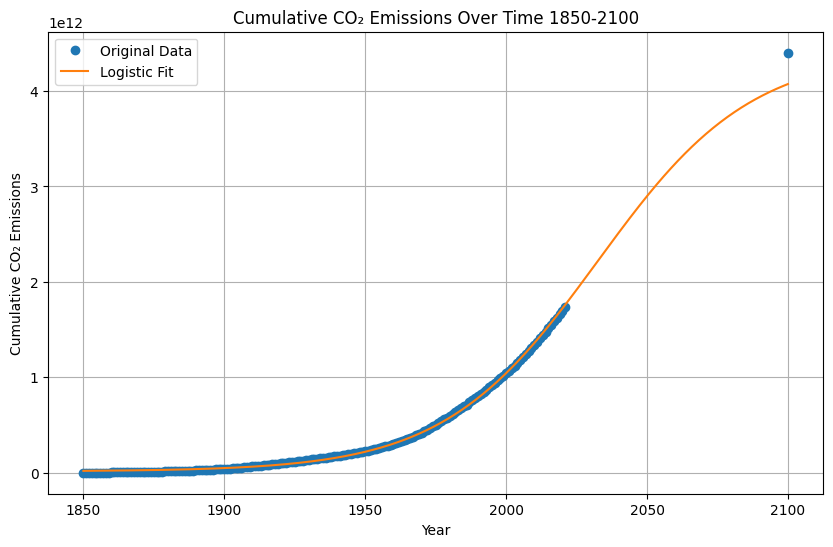

Fitted Logistic Function: L=4401601949855.28, x0=2032.4495373199613, k=0.0365897008409805, b=14402655076.361109
4401601949855.2803 / (1 + exp(-0.0366 * (x - 2032.4495))) + 14402655076.3611


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


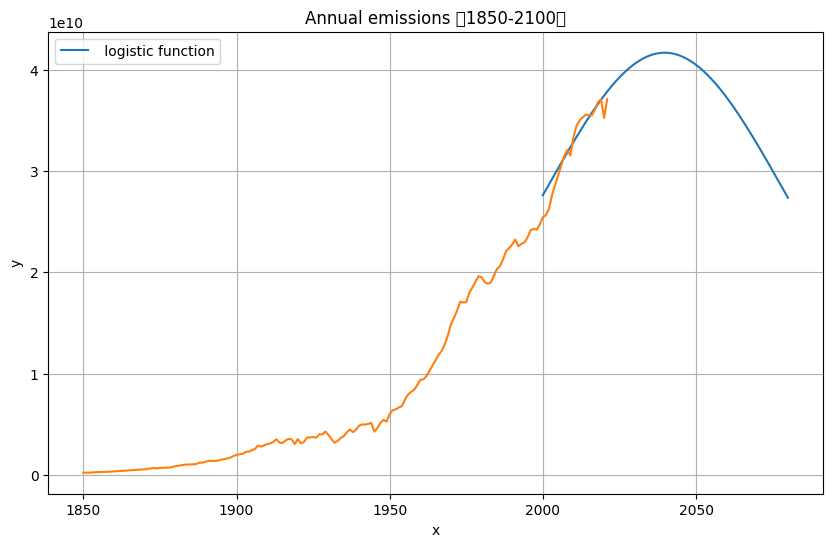

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


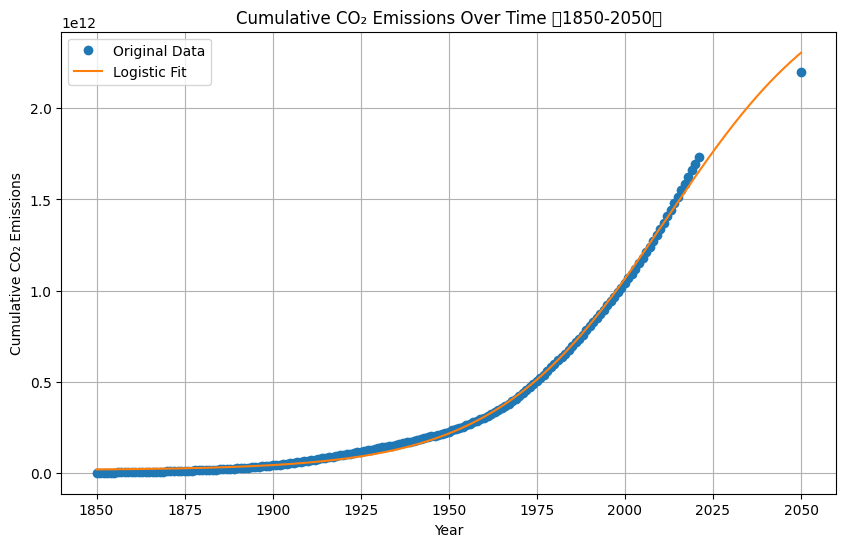

Fitted Logistic Function: L=2770815506410.286, x0=2012.0020496913553, k=0.041130099981608055, b=14715734824.742205
2770815506410.2861 / (1 + exp(-0.0411 * (x - 2012.0020))) + 14715734824.7422


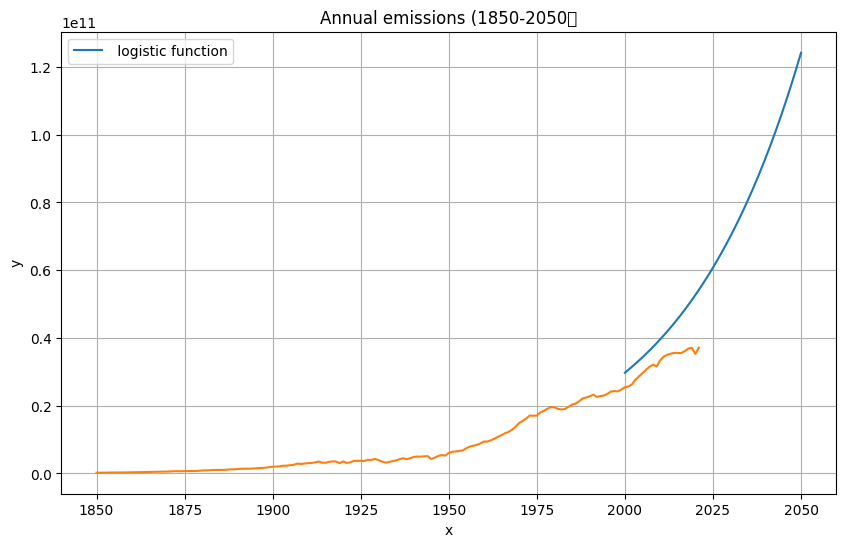

In [ ]:

data_1 = 'https://raw.githubusercontent.com/janzika/MATH3041/main/data/temperature-anomaly.csv'
tem_change_1 = pd.read_csv(data_1)
tem_change_1 = tem_change_1[tem_change_1['Entity'] == 'Global']
tem_change_1= tem_change_1.rename(columns={'Global average temperature anomaly relative to 1961-1990': 'temperature anomaly'})
tem_change_1 = tem_change_1[['Year','temperature anomaly']]

base_year_value = tem_change_1[tem_change_1['Year'] == 1850]['temperature anomaly'].values[0]

tem_change_1['temperature change'] = tem_change_1['temperature anomaly'] - base_year_value

tem_change = tem_change_1[['Year', 'temperature change']]

data_2 = 'https://raw.githubusercontent.com/janzika/MATH3041/main/data/annual-co-emissions-by-region.csv'
emission_1 = pd.read_csv(data_2)
emission_1 = emission_1[(emission_1['Entity'] == 'World') & (emission_1['Year'] >= 1850)]

emission_1['Cumulative CO₂ emissions'] = emission_1['Annual CO₂ emissions (zero filled)'].cumsum()
emission_2 = emission_1[['Year','Cumulative CO₂ emissions']]

emission_2['Cumulative CO₂ emissions'] = emission_2['Cumulative CO₂ emissions']/(3.7*10**12)

emission = emission_2[['Year','Cumulative CO₂ emissions']]


def calculate_ratio(tem_change, emission):

    merged_dT_E = pd.merge(tem_change, emission , on='Year')
    merged_dT_E['ΔT/E_T'] =  (merged_dT_E['temperature change'] /  merged_dT_E['Cumulative CO₂ emissions'])
    return  merged_dT_E[['Year', 'ΔT/E_T']]
result = calculate_ratio(tem_change, emission)


result= result[(result['Year'] >= 1900)]

plt.figure(figsize=(10, 6))
plt.plot(result['Year'], result['ΔT/E_T'], marker='o',  label='Original ΔT/E_T')
plt.title('CCR')
plt.xlabel('Year')
plt.ylabel('CCR')
plt.legend()
plt.grid(True)
plt.show()


x = result['Year']
y = result['ΔT/E_T']


coefficients = np.polyfit(x, y, 1)
linear_fit = np.polyval(coefficients, x)

plt.figure(figsize=(10, 6))
plt.plot(result['Year'], result['ΔT/E_T'], 'o', label='Original ΔT/E_T')
plt.plot(result['Year'], linear_fit, '-', label='Linear Fit')
plt.title('The carbon–climate response')
plt.xlabel('Year')
plt.ylabel('CCR')
plt.legend()
plt.grid(True)
plt.show()


slope, intercept = coefficients
expression = f'CCR = {slope:.4f} * Year + {intercept:.4f}'
print(f'Linear Fit Function: {expression}')


mean_value_since_1900 = result['ΔT/E_T'].mean()
print(f'平均值: {mean_value_since_1900}')


result_1980 = result[(result['Year'] >= 1980)]
mean_value_since_1980 = result_1980['ΔT/E_T'].mean()
print(f'平均值: {mean_value_since_1980}')

####################################################################################
####################################################################################

data = pd.read_csv('https://raw.githubusercontent.com/janzika/MATH3041/main/data/climate-change_2.csv')

data[['Year', 'Month', 'Day']] = data['Date'].str.split('-', expand=True)
data = data.drop(columns=['Day', 'Month'])
data['Year'] = data['Year'].astype(int)

sea_level_yearly_mean = data.groupby('Year').mean(numeric_only=True).reset_index()

sea_level_yearly_mean['sea_level_difference'] = sea_level_yearly_mean['Church & White'].diff()
sea_level_yearly_diff = sea_level_yearly_mean.dropna(subset=['sea_level_difference'])


merged_data = pd.merge(sea_level_yearly_diff, tem_change, on='Year')
x = merged_data['temperature change'].values
y = merged_data['sea_level_difference'].values
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
a_temp = np.sum(x*y)/ np.sum(x**2)

y_fit = slope * x

print(a_temp)


plt.scatter(x, y, label='plots')
plt.plot(x, y_fit, color='red', label='fitted line')
plt.xlabel('Temperature Change since 1881')
plt.ylabel('Sea Level Annual Variation')
plt.legend()
plt.title('Temperature Change since 1881 VS Sea Level Annual Variation')
plt.show()

print(emission_1)

####################################################################################
####################################################################################


emi = emission_1[['Year','Cumulative CO₂ emissions']]
cumulative_emission_2100 = (4/mean_value_since_1900)*(3.7*10**12)
new_row = pd.DataFrame({'Year': [2100], 'Cumulative CO₂ emissions': [cumulative_emission_2100]})
emi = pd.concat([emi, new_row], ignore_index=True)

x = emi['Year']
y = emi['Cumulative CO₂ emissions']


def logistic(x, L, x0, k, b):
    L = cumulative_emission_2100
    return L / (1 + np.exp(-k * (x - x0))) + b


p0 = [max(y), np.median(x), 1, min(y)]  # 初始参数猜测
params, _ = curve_fit(logistic, x, y, p0, maxfev=10000)


x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = logistic(x_fit, *params)


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_fit, y_fit, '-', label='Logistic Fit')
plt.title('Cumulative CO₂ Emissions Over Time 1850-2100')
plt.xlabel('Year')
plt.ylabel('Cumulative CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()


L, x0, k, b = params
logistic_function_expression = f'{L:.4f} / (1 + exp(-{k:.4f} * (x - {x0:.4f}))) + {b:.4f}'
print(f'Fitted Logistic Function: L={L}, x0={x0}, k={k}, b={b}')
print (logistic_function_expression)


def func(x):
    return 4994829491867.6387 * 0.0334 * np.exp(-0.0334 * (x - 2039.7633)) / (1 + np.exp(-0.0334 * (x - 2039.7633)))**2

# Generate x values
x = np.linspace(2000, 2080, 1000)

# Calculate y values
y = func(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=' logistic function')
plt.plot(emission_1["Year"], emission_1["Annual CO₂ emissions (zero filled)"])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Annual emissions （1850-2100）')
plt.legend()
plt.grid(True)
plt.show()

####################################################################################
####################################################################################

emi1 = emission_1[['Year','Cumulative CO₂ emissions']]
cumulative_emission_2050 = (2/mean_value_since_1900)*(3.7*10**12)
new_row1 = pd.DataFrame({'Year': [2050], 'Cumulative CO₂ emissions': [cumulative_emission_2050]})
emi1 = pd.concat([emi1, new_row1], ignore_index=True)

x = emi1['Year']
y = emi1['Cumulative CO₂ emissions']


coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)


x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = polynomial(x_fit)


def logistic(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b


p0 = [max(y), np.median(x), 1, min(y)]  # 初始参数猜测
params, _ = curve_fit(logistic, x, y, p0, maxfev=10000)

# Calculate the regression line
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = logistic(x_fit, *params)

# Draw the orignal data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_fit, y_fit, '-', label='Logistic Fit')
plt.title('Cumulative CO₂ Emissions Over Time （1850-2050）')
plt.xlabel('Year')
plt.ylabel('Cumulative CO₂ Emissions')
plt.legend()
plt.grid(True)
plt.show()


L, x0, k, b = params
logistic_function_expression = f'{L:.4f} / (1 + exp(-{k:.4f} * (x - {x0:.4f}))) + {b:.4f}'
print(f'Fitted Logistic Function: L={L}, x0={x0}, k={k}, b={b}')
print (logistic_function_expression)


def func(x):
    return 4.27947028847957e-15 * np.exp(0.0286 * x) / (8.82465259297597e-32 * np.exp(0.0286 * x) + 1)**2

# Generate x values
x = np.linspace(2000, 2050, 1000)

# Calculate y values
y = func(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=' logistic function')
plt.plot(emission_1["Year"], emission_1["Annual CO₂ emissions (zero filled)"])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Annual emissions (1850-2050）')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
result_2000 = result[(result['Year'] >= 2000)]
mean_value_since_2000 = result_2000['ΔT/E_T'].mean()
print(f'平均值: {mean_value_since_2000}')

平均值: 2.893321849372455


5115227676177.829
3382860144277.829
555725095.2380953
37123850000.0
27.85840910450878


Text(0, 0.5, 'Annual emissions')

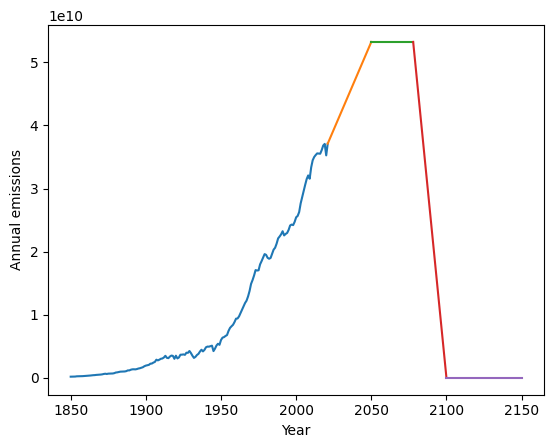

In [ ]:
# cumulative carbon emission increase to meet 4 degree in 2100
C_tar1 = (4/mean_value_since_2000)*(3.7*10**12)
current_C = emission_1.iloc[-1]["Cumulative CO₂ emissions"]
delta_C_tar1 = C_tar1 - current_C
print(C_tar1)
print(delta_C_tar1)

# last 20 year average rate of emission (2015-2021)
m_last5 = np.diff(emission_1[emission_1["Year"] >= 2000]["Annual CO₂ emissions (zero filled)"]).mean()
print(m_last5)

# current annual emission
a = emission_1.iloc[-1]["Annual CO₂ emissions (zero filled)"]
print(a)

# annual emission if follwo m_last5 to 2050
a1 = m_last5*(2050-2021) + a

# cumulative carbon emission increase from 2050 to 2100 if to meet 4 degree
A1 = 0.5*(2050-2021)*(a + a1)
delta_C2050_tar1 = delta_C_tar1 - A1

# find how many years after 2050 to start decrease annual emission
x_tar1 = 2*(delta_C2050_tar1/a1 - 50/2)
print(x_tar1)
# plot three steps for annual emission
x1_tar1 = np.linspace(2021, 2050, num = (2050-2021))
y1_tar1 = m_last5*x1_tar1 + (a - m_last5*2021)

x2_tar1 = np.linspace(2050, 2050+x_tar1, num = math.ceil(x_tar1))
y2_tar1 = a1 + 0*x2_tar1

x3_tar1 = np.linspace(2050+x_tar1, 2100, num = (50 - math.ceil(x_tar1)))
y3_tar1 = -(a1/(50-x_tar1))*x3_tar1 + a1*2100/(50-x_tar1)

x4_tar1 = np.linspace(2100, 2150, num = (2150-2100))
y4_tar1 = 0*x4_tar1

# plot annual emission
historical_years = emission_1["Year"]
historical_annual = emission_1["Annual CO₂ emissions (zero filled)"]
plt.plot(historical_years, historical_annual)
plt.plot(x1_tar1, y1_tar1)
plt.plot(x2_tar1, y2_tar1)
plt.plot(x3_tar1, y3_tar1)
plt.plot(x4_tar1, y4_tar1)
plt.xlabel("Year")
plt.ylabel("Annual emissions")


Text(0, 0.5, 'cumulative emissions')

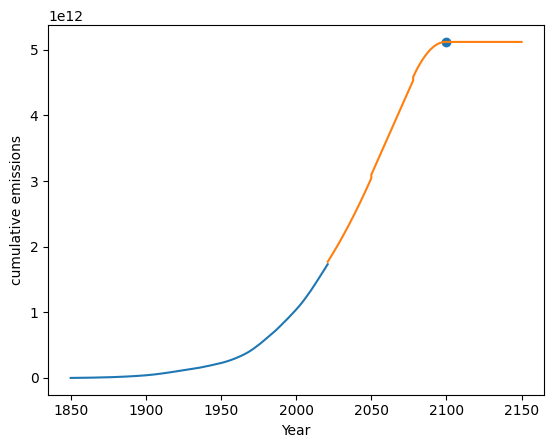

In [ ]:
x_pred_tar1 = np.concatenate([x1_tar1, x2_tar1, x3_tar1, x4_tar1])
y_pred_tar1 = current_C + np.concatenate([y1_tar1, y2_tar1, y3_tar1, y4_tar1]).cumsum()

historical_cum = emission_1["Cumulative CO₂ emissions"]
plt.plot(historical_years, historical_cum)
plt.plot(x_pred_tar1, y_pred_tar1)
plt.scatter(2100, C_tar1)
plt.xlabel("Year")
plt.ylabel("cumulative emissions")

15.45909064867542


Text(0, 0.5, 'Annual emissions')

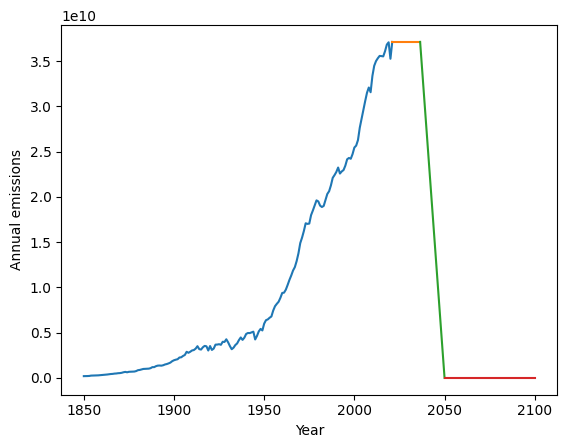

In [ ]:
# cumulative emission to meet 2 degree in 2050
C_tar2 = (2/mean_value_since_2000)*(3.7*10**12)
current_C = emission_1.iloc[-1]["Cumulative CO₂ emissions"]
delta_C_tar2 = C_tar2 - current_C

# current annual emission
a = emission_1.iloc[-1]["Annual CO₂ emissions (zero filled)"]

# find how many years after 2021 to start decrease annual emission
x_tar2 = 2*(delta_C_tar2/a - 29/2)
print(x_tar2)

# plot step for annual emission
x1_tar2 = np.linspace(2021, 2021 + x_tar2, num = math.ceil(x_tar2))
y1_tar2 = a + 0*x1_tar2

x2_tar2 = np.linspace(2021 + x_tar2, 2050, num = 29 - math.ceil(x_tar2))
y2_tar2 = -a*x2_tar2/(29 - x_tar2) + a*2050/(29 - x_tar2)

x3_tar2 = np.linspace(2050, 2100, num = (2100-2050))
y3_tar2 = 0*x3_tar2

plt.plot(historical_years, historical_annual)
plt.plot(x1_tar2, y1_tar2)
plt.plot(x2_tar2, y2_tar2)
plt.plot(x3_tar2, y3_tar2)
plt.xlabel("Year")
plt.ylabel("Annual emissions")

Text(0, 0.5, 'Cumulative emissions')

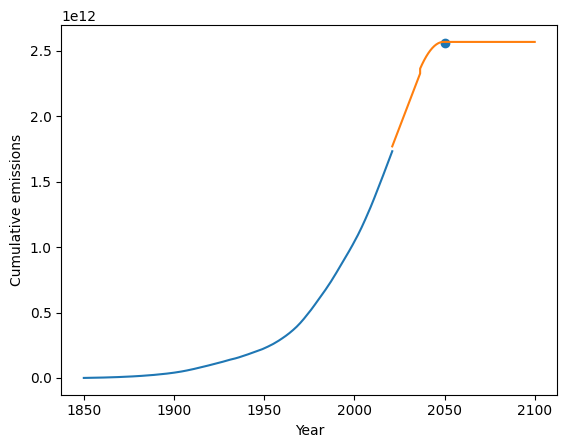

In [ ]:
x_pred_tar2 = np.concatenate([x1_tar2, x2_tar2, x3_tar2])
y_pred_tar2 = current_C + np.concatenate([y1_tar2, y2_tar2, y3_tar2]).cumsum()

historical_cum = emission_1["Cumulative CO₂ emissions"]
plt.plot(historical_years, historical_cum)
plt.plot(x_pred_tar2, y_pred_tar2)
plt.scatter(2050, C_tar2)
plt.xlabel('Year')
plt.ylabel('Cumulative emissions')

24.831984429243516


Text(0, 0.5, 'Annual emissions')

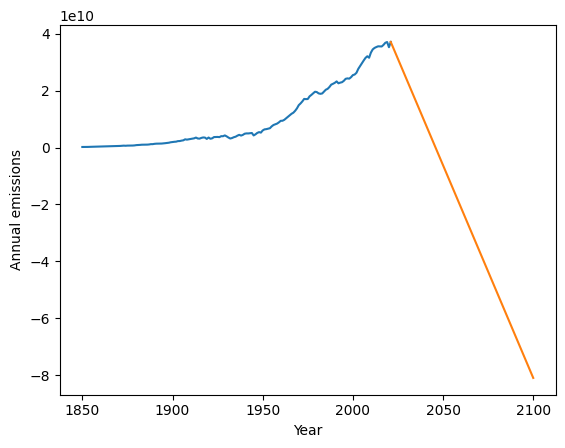

In [ ]:
# cumulative emission to meet 1.5 degree
C_tar3 = (1.5/mean_value_since_2000)*(3.7*10**12)
current_C = emission_1.iloc[-1]["Cumulative CO₂ emissions"]

# current annual emission
a = emission_1.iloc[-1]["Annual CO₂ emissions (zero filled)"]

# find time when annual emission goes negative
x_tar3 = (0.5*a*79**2)/(current_C + 79*a)
print(x_tar3)

# plot annual emission
x1_tar3 = np.linspace(2021, 2100, num = (2100 - 2021))
y1_tar3 = -a*x1_tar3/x_tar3 + a*(2021+x_tar3)/x_tar3

plt.plot(historical_years, historical_annual)
plt.plot(x1_tar3, y1_tar3)
plt.xlabel('Year')
plt.ylabel('Annual emissions')

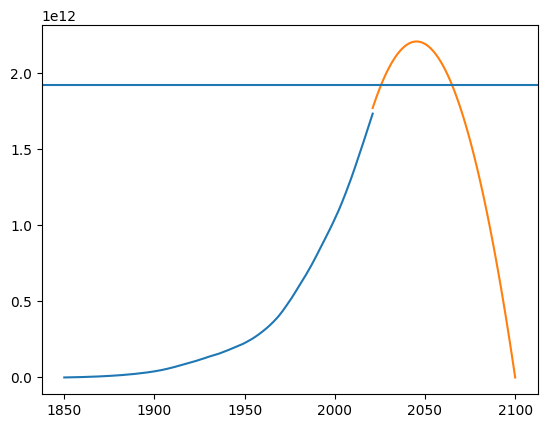

In [ ]:
x_pred_tar3 = x1_tar3
y_pred_tar3 = current_C + y1_tar3.cumsum()


historical_cum = emission_1["Cumulative CO₂ emissions"]
plt.plot(historical_years, historical_cum)
plt.plot(x_pred_tar3, y_pred_tar3)
plt.axhline(C_tar3)

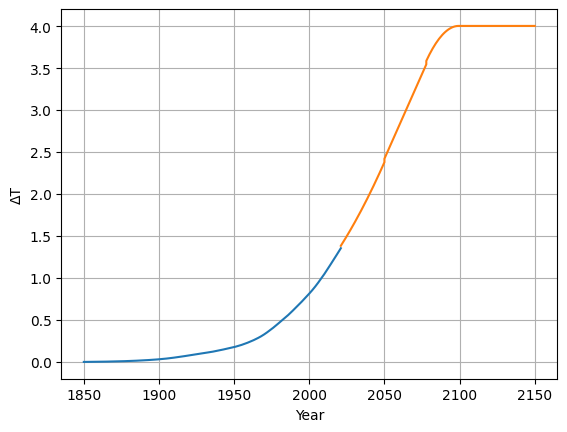

72180      0.000574
72181      0.001727
72182      0.003485
72183      0.005876
72184      0.009010
            ...    
72347    166.023613
72348    170.753037
72349    175.590526
72350    180.530782
72351    185.579223
Name: Cumulative CO₂ emissions, Length: 172, dtype: float64


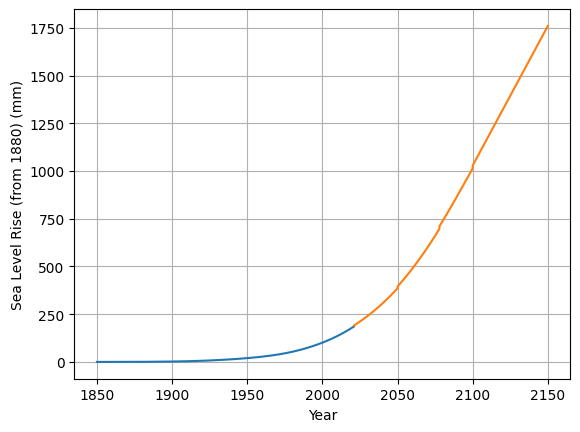

In [ ]:
# Target 1
# temperature change from pre-industrial value (1880)

historical_temp = (historical_cum/(3.7*10**12))*mean_value_since_2000
temp_pred_tar1 = (y_pred_tar1/(3.7*10**12))*mean_value_since_2000

plt.plot(historical_years, historical_temp)
plt.plot(x_pred_tar1, temp_pred_tar1)
plt.xlabel("Year")
plt.ylabel("ΔT")
plt.grid(True)
plt.show()

# sea level rise from pre-industrial value (1880)
historical_H = a_temp*historical_temp.cumsum()
print(historical_H)
H_pred_tar1 = historical_H.iloc[-1] + a_temp*temp_pred_tar1.cumsum()

plt.plot(historical_years, historical_H)
plt.plot(x_pred_tar1, H_pred_tar1)
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (from 1880) (mm)")
plt.grid(True)
plt.show()

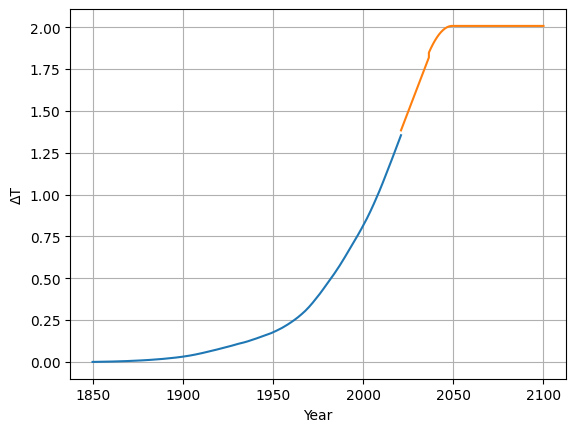

72180      0.000574
72181      0.001727
72182      0.003485
72183      0.005876
72184      0.009010
            ...    
72347    166.023613
72348    170.753037
72349    175.590526
72350    180.530782
72351    185.579223
Name: Cumulative CO₂ emissions, Length: 172, dtype: float64


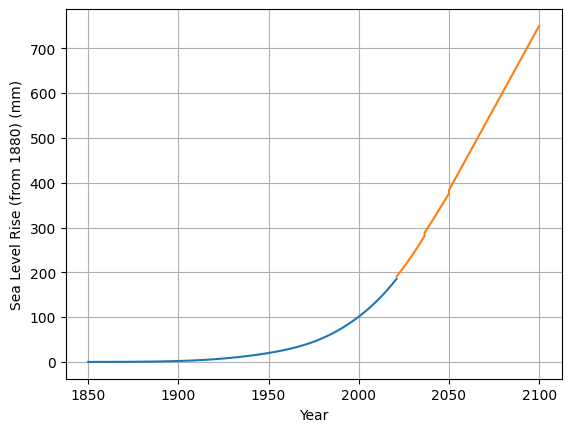

In [ ]:
# Target 2
# temperature change from pre-industrial value (1880)

historical_temp = (historical_cum/(3.7*10**12))*mean_value_since_2000
temp_pred_tar2 = (y_pred_tar2/(3.7*10**12))*mean_value_since_2000

plt.plot(historical_years, historical_temp)
plt.plot(x_pred_tar2, temp_pred_tar2)
plt.xlabel("Year")
plt.ylabel("ΔT")
plt.grid(True)
plt.show()

# sea level rise from pre-industrial value (1880)
historical_H = a_temp*historical_temp.cumsum()
print(historical_H)
H_pred_tar2 = historical_H.iloc[-1] + a_temp*temp_pred_tar2.cumsum()

plt.plot(historical_years, historical_H)
plt.plot(x_pred_tar2, H_pred_tar2)
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (from 1880) (mm)")
plt.grid(True)
plt.show()

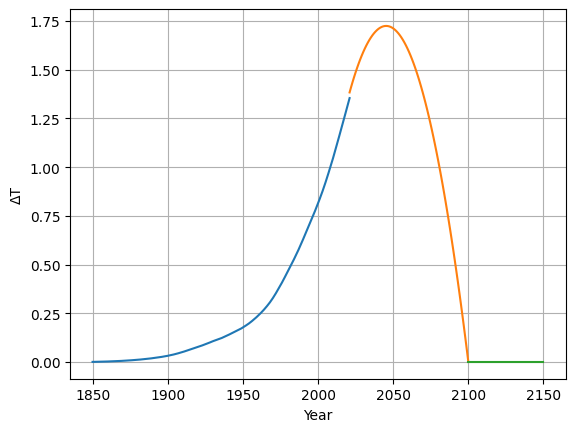

72180      0.000574
72181      0.001727
72182      0.003485
72183      0.005876
72184      0.009010
            ...    
72347    166.023613
72348    170.753037
72349    175.590526
72350    180.530782
72351    185.579223
Name: Cumulative CO₂ emissions, Length: 172, dtype: float64


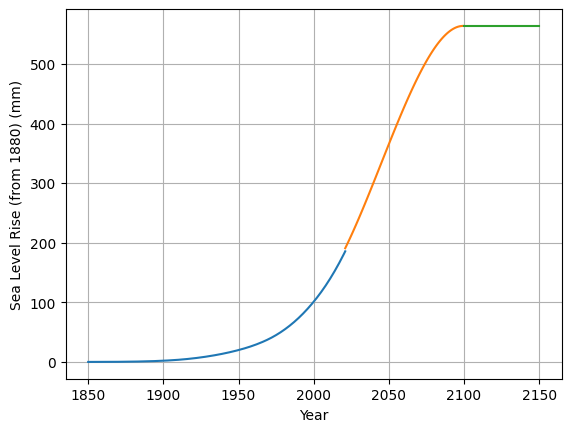

In [ ]:
# Target 3
# temperature change from pre-industrial value (1880)

historical_temp = (historical_cum/(3.7*10**12))*mean_value_since_2000
temp_pred_tar3 = (y_pred_tar3/(3.7*10**12))*mean_value_since_2000

x_add_tar3 = np.linspace(2100,2150, num = 50)
temp_add_tar3 = 0*x_add_tar3

plt.plot(historical_years, historical_temp)
plt.plot(x_pred_tar3, temp_pred_tar3)
plt.plot(x_add_tar3, temp_add_tar3)
plt.xlabel("Year")
plt.ylabel("ΔT")
plt.grid(True)
plt.show()

# sea level rise from pre-industrial value (1880)
historical_H = a_temp*historical_temp.cumsum()
print(historical_H)
H_pred_tar3 = historical_H.iloc[-1] + a_temp*temp_pred_tar3.cumsum()
H_add_tar3 = H_pred_tar3[-1] + a_temp*temp_add_tar3

plt.plot(historical_years, historical_H)
plt.plot(x_pred_tar3, H_pred_tar3)
plt.plot(x_add_tar3, H_add_tar3)
plt.xlabel("Year")
plt.ylabel("Sea Level Rise (from 1880) (mm)")
plt.grid(True)
plt.show()